http://www.scipy-lectures.org/packages/scikit-learn/index.html
    
Resume from 3.6. scikit-learn: machine learning in Python

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
n_samples, n_features = iris.data.shape

In [4]:
df = pd.DataFrame(iris.data, 
                  columns=['sepal length', 'sepal width',
                           'petal length', 'petal width'])
df = df.assign(target=pd.Series(iris.target))
df.describe()

,sepal length,sepal width,petal length,petal width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


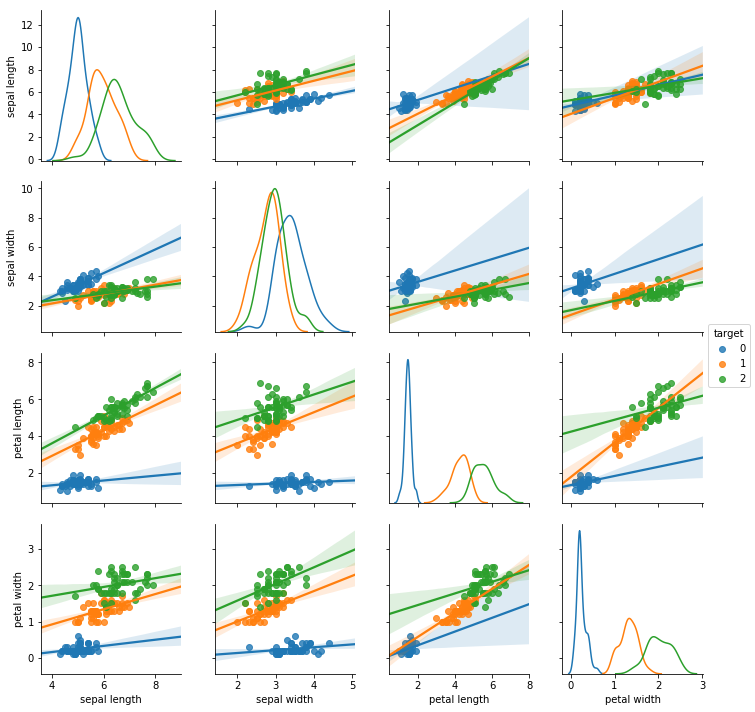

In [5]:
sns.pairplot(df, hue="target", kind='reg', diag_kind='kde',
             vars=['sepal length', 'sepal width',
                   'petal length', 'petal width'])

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression(normalize=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [8]:
x = np.array([0, 1, 2])
y = np.array([0, 1, 2])
X = x[:, np.newaxis]
X

array([[0],
       [1],
       [2]])

In [9]:
model.fit(X, y)
model.intercept_

1.1102230246251565e-16

In [10]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [11]:
iris.target_names[knn.predict([[3, 5, 4, 2]])]

array(['virginica'], dtype='<U10')